In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

## Load Iris data 
The famous Iris database, first used by Sir R.A. Fisher. The data set contains 3 classes (Iris-setosa,Iris-Versicolour, Iris-Virginica ) of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2. From sklearn.datasets.

In [2]:
# get the data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Make a new pandas dataframe
df = pd.DataFrame({'sepal length': X[:, 0], 
                    'sepal width': X[:, 1], 
                    'petal length':X[:, 2],
                   'petal width': X[:, 3],
                   'species': y})

In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.describe(include='all').round()

,sepal length,sepal width,petal length,petal width,species
count,150.0,150.0,150.0,150.0,150.0
mean,6.0,3.0,4.0,1.0,1.0
std,1.0,0.0,2.0,1.0,1.0
min,4.0,2.0,1.0,0.0,0.0
25%,5.0,3.0,2.0,0.0,0.0
50%,6.0,3.0,4.0,1.0,1.0
75%,6.0,3.0,5.0,2.0,2.0
max,8.0,4.0,7.0,2.0,2.0


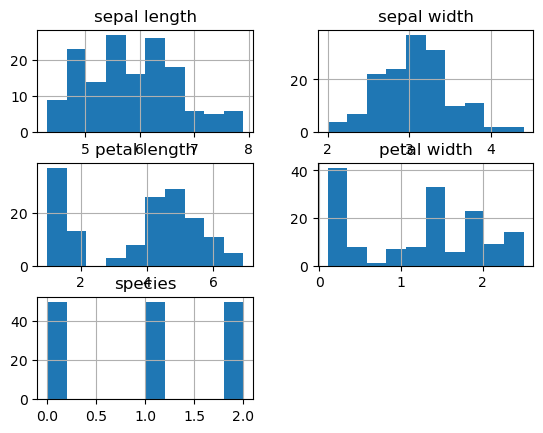

In [6]:
df.hist();

In [7]:
# Input data 
X = df.iloc[:, [0, 1, 2, 3]]
Y = df['species']

## Find a number for K using the elbow method
Elbow point is a useful approach to finding the suitable k number when it is unknown. The total distance from data points reduces while k increases. The plot indicates the point where the gradient changes from steep to shallow.

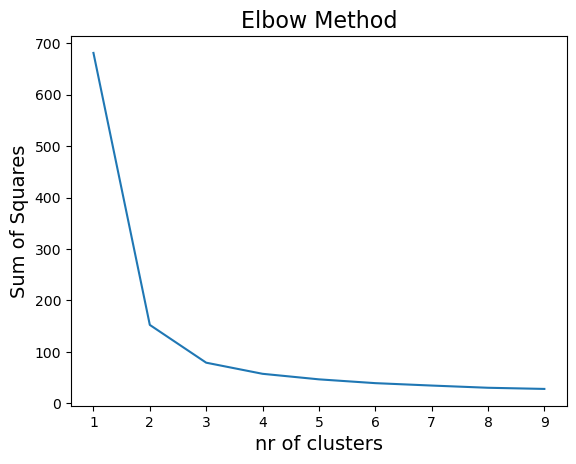

In [8]:
# using elbow method
sum_of_squares = []
for i in range(1, 10):
    model = KMeans(n_clusters=i,
                   init='k-means++',
                   max_iter=100,
                   n_init=12, 
                   random_state=12)
    model.fit(X)
    sum_of_squares.append(model.inertia_)

# plot the sum of distance
plt.title('Elbow Method', size=16)
plt.plot(range(1, 10), sum_of_squares)
plt.xlabel('nr of clusters' , size=14)
plt.ylabel('Sum of Squares', size=14)
plt.show()

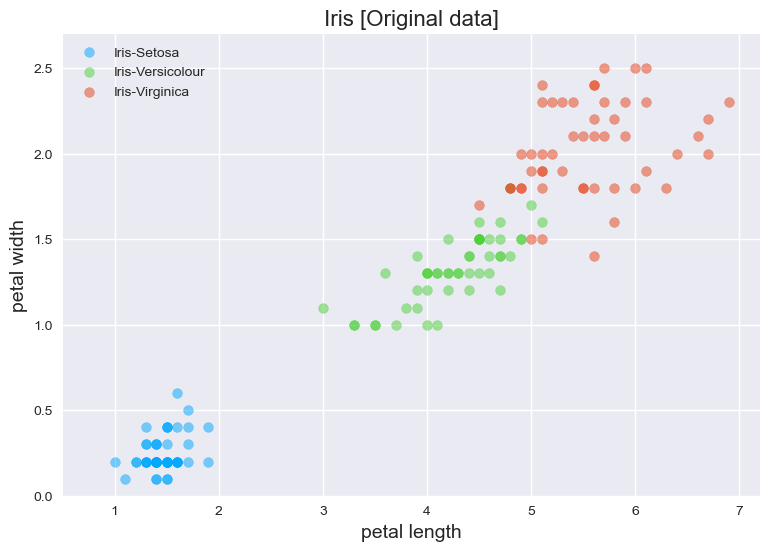

In [9]:
# Plot original data
plt.figure(figsize=(9, 6))
plt.style.use('seaborn-v0_8')

plt.scatter(df['petal length'][df['species']==0], 
            df['petal width'][df['species']==0], 
            alpha=0.5, 
            s=50, 
            c='#00a8ff', 
            label='Iris-Setosa' )
#  species with 1 predicted
plt.scatter(df['petal length'][df['species']==1], 
            df['petal width'][df['species']==1],
            alpha=0.5, 
            s=50, 
            c='#4cd137', 
            label='Iris-Versicolour')
#  species with 2 predicted
plt.scatter(df['petal length'][df['species']==2], 
            df['petal width'][df['species']==2],
            alpha=0.5, 
            s=50, 
            c='#e84118', 
            label='Iris-Virginica') 
plt.legend()
plt.xlabel(df.columns[2], size=14)
plt.ylabel(df.columns[3], size=14)
plt.xlim([0.5, 7.2])
plt.ylim([0, 2.7])
plt.title('Iris [Original data]', size=16)
plt.show()

## K-Means model

K-Means is one of the most popular method for unsupervised leraning. It uses Euclidian distance and works by trying to minimise the squared distances to the cluster centres for inputs. It continues to recalculate and reassign cluster centres until the distance does not change. Selecting initial cluster centres randomly may not efficiently divide inputs very well. K-Means++ improves the accuracy of a model by using a uniform probability distribution. 

In [15]:
# build model using k-means++
model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=20, random_state=52)
model.fit(X)
# a new column with prediction
df['pred'] = model.fit_predict(X)

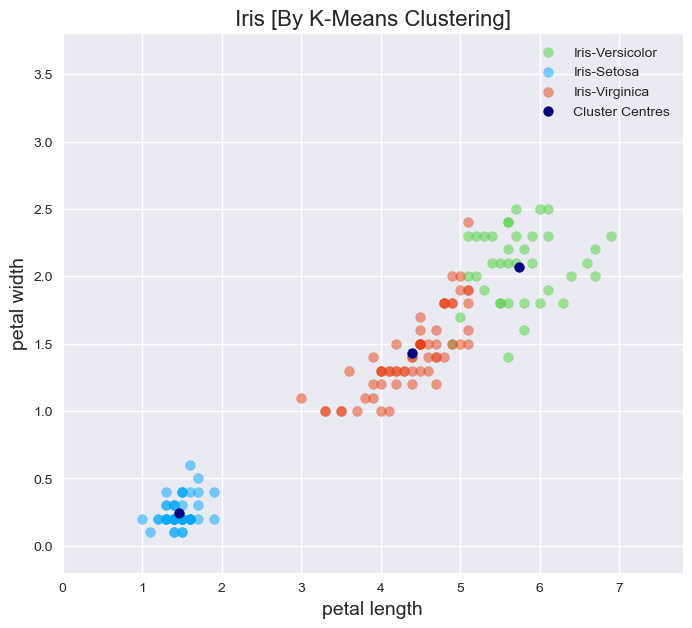

In [16]:
# Plot the result for petal length and petal width combination

plt.figure(figsize=(8, 7))
plt.style.use('seaborn-v0_8')

plt.scatter(df[df['pred'] == 0]['petal length'], 
            df[df['pred'] == 0]['petal width'],
            alpha=0.5, 
            s=50, 
            c='#4cd137', 
            label='Iris-Versicolor')

plt.scatter(df[df['pred'] == 1]['petal length'], 
            df[df['pred'] == 1]['petal width'],
            alpha=0.5, 
            s=50, 
            c='#00a8ff', 
            label='Iris-Setosa' )

plt.scatter(df[df['pred'] == 2]['petal length'], 
            df[df['pred'] == 2]['petal width'],
            alpha=0.5, 
            s=50, 
            c='#e84118', 
            label='Iris-Virginica' )

# Cluster centres
c = model.cluster_centers_
plt.scatter(c[:, 2], c[:, 3], s=50, c='navy', label='Cluster Centres')
plt.ylabel(df.columns[3], size=14)
plt.xlabel(df.columns[2], size=14)
plt.xlim([0, 7.8])
plt.ylim([-0.2, 3.8])
plt.title('Iris [By K-Means Clustering]', size=16)
plt.legend()
plt.show()

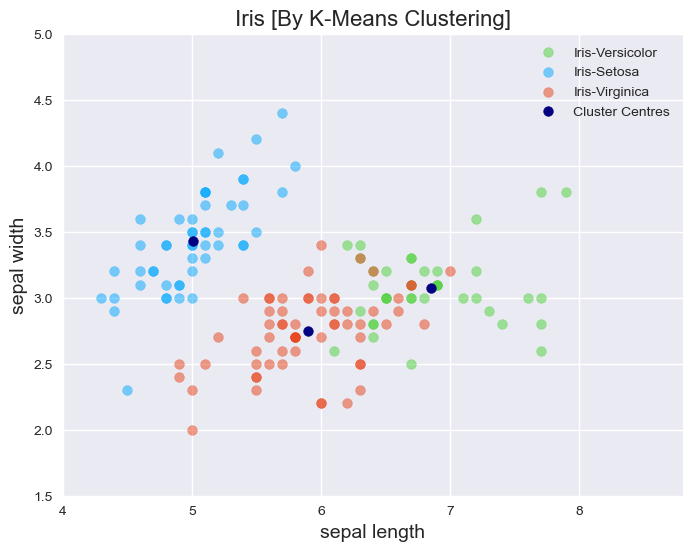

In [17]:
# Plot the result for sepal length and sepal width combination

plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8')

plt.scatter(df[df['pred'] == 0]['sepal length'], 
            df[df['pred'] == 0]['sepal width'],
            alpha=0.5, 
            s=50, 
            c='#4cd137', 
            label='Iris-Versicolor')

plt.scatter(df[df['pred'] == 1]['sepal length'], 
            df[df['pred'] == 1]['sepal width'],
            alpha=0.5, 
            s=50, 
            c='#00a8ff', 
            label='Iris-Setosa' )

plt.scatter(df[df['pred'] == 2]['sepal length'], 
            df[df['pred'] == 2]['sepal width'],
            alpha=0.5, 
            s=50, 
            c='#e84118', 
            label='Iris-Virginica' )

# cluster centres
c = model.cluster_centers_
plt.scatter(c[:, 0], c[:, 1], s=50, c='navy', label='Cluster Centres')
plt.xlabel(df.columns[0], size=14)
plt.ylabel(df.columns[1], size=14)
plt.xlim([4, 8.8])
plt.ylim([1.5, 5])
plt.title('Iris [By K-Means Clustering]', size=16)
plt.legend()
plt.show()